# Problem Statement: Predictive Modeling for Disease Diagnosis


#### Background:
Healthcare professionals often rely on various diagnostic tests and biomarkers to assess an individual's
health status and diagnose diseases. In this scenario, we have access to a dataset containing multiple
health-related attributes such as cholesterol levels, blood cell counts, hormone levels, and other
physiological measurements. The dataset also includes information on whether the individual has been
diagnosed with a specific disease or not.

#### Objective:
The objective of this project is to develop a predictive model that can accurately classify individuals into
diseased or non-diseased categories based on their health attributes. By leveraging machine learning
algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease
diagnosis and prognosis.

#### Data Description:
###### The dataset consists of the following attributes:
* Cholesterol: Level of cholesterol in the blood (mg/dL)
* Hemoglobin: Protein in red blood cells carrying oxygen
* Platelets: Blood cells aiding in clotting
* White Blood Cells (WBC): Immune system cells fighting infections
* Red Blood Cells (RBC): Cells carrying oxygen
* Hematocrit: Percentage of blood volume occupied by RBC
* Mean Corpuscular Volume (MCV): Average volume of RBC
* Mean Corpuscular Hemoglobin (MCH): Average amount of hemoglobin in RBC
* Mean Corpuscular Hemoglobin Concentration (MCHC): Average concentration of hemoglobin in RBC
* Insulin: Hormone regulating blood sugar levels
* BMI (Body Mass Index): Measure of body fat based on height and weight
* Systolic Blood Pressure (SBP): Pressure in arteries during heartbeats
* Diastolic Blood Pressure (DBP): Pressure in arteries at rest between beats
* Triglycerides: Type of fat found in blood (mg/dL)
* HbA1c (Glycated Hemoglobin): Measure of average blood sugar levels over past 2-3 months
* LDL (Low-Density Lipoprotein) Cholesterol: "Bad" cholesterol
* HDL (High-Density Lipoprotein) Cholesterol: "Good" cholesterol
* ALT (Alanine Aminotransferase): Liver enzyme
* AST (Aspartate Aminotransferase): Enzyme found in liver and heart
* Heart Rate: Number of heartbeats per minute (bpm)
* Creatinine: Waste product produced by muscles and filtered by kidneys
* Troponin: Protein released into bloodstream during heart muscle damage
* C-reactive Protein (CRP): Marker of inflammation in the body
* Disease: Binary indicator (1: Diseased, 0: Non-diseased)

#### Task:
Given this dataset, the task is to build a machine learning model capable of predicting the likelihood of
an individual having a specific disease based on their health attributes. The model's performance will be
evaluated using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.

#### Outcome:
The ultimate goal is to develop a robust predictive model that can assist healthcare professionals in
early disease detection and patient management. By accurately identifying individuals at risk of certain
diseases, interventions can be initiated promptly, potentially improving patient outcomes and reducing
healthcare cost

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
train_df = pd.read_csv("Disease_prediction_Train_data .csv")


In [4]:
test_df = pd.read_csv('Disease_prediction_test_data .csv')

In [5]:
train_df.sample(10)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
181,0.531424,0.331335,0.851987,0.413340,0.702885,0.801220,0.480280,0.103437,0.921178,0.186532,0.051976,0.754884,0.546705,0.400560,0.189918,0.795469,0.518181,0.952549,0.727706,0.013013,0.825122,0.138405,0.382066,0.565082,Thalasse
1154,0.143772,0.089600,0.027259,0.171121,0.744950,0.452787,0.871778,0.995263,0.872038,0.311175,0.655545,0.358225,0.392288,0.111589,0.012693,0.133001,0.261072,0.200323,0.363050,0.558191,0.304237,0.306539,0.566289,0.754189,Thalasse
1804,0.357817,0.250056,0.466870,0.624206,0.618684,0.545752,0.245236,0.453052,0.162934,0.670361,0.277644,0.601662,0.179951,0.590693,0.064391,0.537799,0.411453,0.484999,0.235162,0.566215,0.403785,0.737241,0.388105,0.406190,Healthy
153,0.209594,0.585042,0.771284,0.068281,0.565967,0.336127,0.619969,0.292981,0.778160,0.975586,0.292164,0.142010,0.412174,0.060663,0.044067,0.775666,0.278783,0.628596,0.480949,0.364597,0.310375,0.415058,0.240045,0.252020,Thalasse
150,0.141529,0.577854,0.097310,0.127061,0.227751,0.636459,0.400861,0.613072,0.020861,0.855190,0.444806,0.553962,0.499140,0.569009,0.897604,0.459586,0.485988,0.125369,0.771416,0.170894,0.352647,0.925924,0.699490,0.251547,Diabetes
2083,0.016514,0.615418,0.577672,0.561694,0.837087,0.479954,0.295866,0.722293,0.916096,0.218293,0.410393,0.063970,0.198208,0.153407,0.308743,0.079865,0.462098,0.292551,0.686779,0.714632,0.298837,0.718824,0.298533,0.030796,Thalasse
706,0.693767,0.730686,0.751196,0.747326,0.742084,0.413056,0.820138,0.140164,0.756092,0.488189,0.772896,0.529332,0.510764,0.488942,0.093734,0.755660,0.603351,0.381331,0.274330,0.443498,0.518567,0.645247,0.088596,0.751157,Healthy
87,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,0.525230,0.558362,0.741009,0.678500,0.299213,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
235,0.729868,0.905026,0.520473,0.306955,0.743164,0.667150,0.769573,0.183771,0.246542,0.161920,0.373664,0.877876,0.073897,0.700550,0.184604,0.188792,0.977656,0.341007,0.797158,0.994460,0.591303,0.425296,0.007490,0.196192,Diabetes
1216,0.620479,0.389207,0.535345,0.790307,0.313630,0.315465,0.329199,0.615705,0.784896,0.939727,0.677778,0.679696,0.005988,0.761455,0.348369,0.798970,0.467680,0.819674,0.182953,0.767707,0.727633,0.798090,0.470731,0.797906,Thalasse


In [6]:
test_df.sample(2)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
71,0.351750,0.779347,0.853931,0.086962,0.419112,0.997267,0.872735,0.663424,0.237384,0.025456,0.098052,0.388500,0.408733,0.635551,0.254155,0.302622,0.397986,0.507592,0.296318,0.070183,0.692371,0.542286,0.150351,0.879291,Thromboc
422,0.095617,0.053515,0.797956,0.082490,0.320569,0.319822,0.233994,0.207105,0.767694,0.044434,0.886011,0.619077,0.828659,0.378844,0.010075,0.570497,0.757505,0.342178,0.013535,0.477389,0.534148,0.575858,0.772292,0.114076,Diabetes


In [7]:
train_df.shape 

(2351, 25)

In [8]:
test_df.shape

(486, 25)

In [9]:
train_df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [10]:
#Checking the null values
train_df.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [39]:
# This dataset has no missing values, 
#check for the special character and duplicates. 
train_df.isin(['?','-','_','.']).sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [40]:
train_df[train_df.duplicated()].head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
9,0.399017,0.508254,0.777394,0.096310,0.925520,0.652505,0.684896,0.380656,0.248189,0.490245,0.151013,0.306056,0.722350,0.535940,0.391481,0.673188,0.033037,0.772045,0.253892,0.322486,0.659069,0.774219,0.714177,0.609177,Thromboc
21,0.722428,0.300282,0.487907,0.200865,0.402035,0.729285,0.851338,0.820546,0.106637,0.006947,0.797331,0.524159,0.747593,0.141501,0.128765,0.022621,0.061317,0.644191,0.715823,0.417170,0.639148,0.213026,0.549920,0.036800,Thalasse
24,0.016514,0.615418,0.577672,0.561694,0.837087,0.479954,0.295866,0.722293,0.916096,0.218293,0.410393,0.063970,0.198208,0.153407,0.308743,0.079865,0.462098,0.292551,0.686779,0.714632,0.298837,0.718824,0.298533,0.030796,Thalasse
25,0.377112,0.391959,0.577246,0.573482,0.685303,0.605134,0.472465,0.098744,0.721378,0.319725,0.700015,0.153261,0.309886,0.445291,0.694545,0.646206,0.657711,0.307132,0.261195,0.404761,0.599542,0.477714,0.277383,0.607319,Healthy
26,0.032726,0.053596,0.102633,0.221356,0.153956,0.216573,0.312577,0.608940,0.486174,0.450700,0.288485,0.581466,0.710744,0.407323,0.060230,0.188750,0.331887,0.562622,0.680462,0.099538,0.982893,0.437285,0.288961,0.709262,Anemia


In [13]:
train_df.duplicated().sum()

2286

In [14]:
print('Duplicate data percentage = ',(2286*100)/2351)

Duplicate data percentage =  97.23521905572098


## This dataset has 97.235% duplicate data.

In [15]:
train_df.drop_duplicates(inplace = True)

In [16]:
train_df.shape

(65, 25)

In [17]:
train_df['Disease'].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc'],
      dtype=object)

In [18]:
train_df['Disease'].value_counts()

Disease
Healthy     16
Diabetes    16
Anemia      16
Thalasse    14
Thromboc     3
Name: count, dtype: int64

In [19]:
test_df['Disease'].value_counts()

Disease
Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: count, dtype: int64

In [20]:
train_df.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,0.364444,0.386982,0.584164,0.503671,0.519215,0.510878,0.521241,0.496714,0.474516,0.565446,0.445734,0.446408,0.376719,0.417883,0.378526,0.450550,0.418075,0.544591,0.438943,0.446143,0.583107,0.422459,0.459669,0.425417
std,0.256628,0.237643,0.271997,0.306086,0.280521,0.266747,0.286287,0.282634,0.316689,0.270276,0.245790,0.244961,0.232698,0.251095,0.262623,0.267261,0.248769,0.272691,0.268527,0.246528,0.252885,0.238231,0.257696,0.248995
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,0.034129,0.014596,0.005988,0.005579,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.136609,0.195818,0.360497,0.200865,0.294538,0.297138,0.295866,0.287532,0.206693,0.364312,0.219111,0.250097,0.179951,0.175469,0.151774,0.188792,0.231304,0.307132,0.214581,0.239659,0.344728,0.206610,0.288961,0.196192
50%,0.351722,0.391959,0.609836,0.533962,0.533017,0.467431,0.494564,0.459985,0.389457,0.603635,0.444806,0.497018,0.355545,0.474378,0.317857,0.466795,0.413071,0.512941,0.373235,0.469085,0.610860,0.417295,0.465957,0.481601
75%,0.582278,0.577854,0.791215,0.754841,0.744950,0.729285,0.758897,0.722293,0.770577,0.741381,0.654441,0.624374,0.576397,0.632179,0.593129,0.670665,0.603351,0.779378,0.710319,0.611674,0.800666,0.606719,0.683323,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,0.966784,0.898210,0.829100,0.934617,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


In [21]:
# correlation metrix
train_df.iloc[:,:-1].corr()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
Glucose,1.000000,0.199848,0.131658,0.102414,0.040146,-0.035723,0.187848,0.028006,-0.118320,0.056465,0.054311,0.381207,-0.001045,0.063177,-0.160775,0.049684,0.094025,-0.144526,0.002351,-0.063084,0.021454,-0.217788,0.195723,0.222067
Cholesterol,0.199848,1.000000,0.181202,0.016947,0.007614,0.144612,0.093144,-0.060669,-0.276457,0.150594,0.124941,-0.118522,-0.159364,-0.015329,0.132231,0.053271,0.158470,0.128175,0.031892,0.149161,-0.158558,-0.008452,-0.087639,-0.196230
Hemoglobin,0.131658,0.181202,1.000000,0.144952,0.064295,0.027582,-0.003213,-0.140412,0.184339,0.020720,-0.174135,-0.036811,0.181441,0.155376,0.109772,0.069695,0.270541,-0.022228,0.011705,-0.108896,0.033904,-0.029450,-0.085611,-0.043709
Platelets,0.102414,0.016947,0.144952,1.000000,-0.076228,0.014896,-0.182602,0.138692,-0.060768,-0.013018,-0.062878,0.006296,0.019330,0.072156,-0.244200,0.116212,-0.183436,-0.195463,-0.072805,0.085171,-0.079869,-0.005577,-0.017036,0.014317
White Blood Cells,0.040146,0.007614,0.064295,-0.076228,1.000000,0.093834,0.247522,-0.017649,0.015030,-0.024235,-0.120832,0.048866,-0.020156,-0.071185,0.091973,0.049067,-0.020647,-0.038571,0.004796,0.172244,0.194334,0.040959,-0.132281,0.027447
Red Blood Cells,-0.035723,0.144612,0.027582,0.014896,0.093834,1.000000,-0.096712,-0.146411,-0.039066,-0.120787,-0.194470,0.030390,0.007374,-0.080730,0.061811,0.116524,0.198737,0.274500,0.155611,-0.164479,0.054891,-0.129000,-0.136720,-0.168959
Hematocrit,0.187848,0.093144,-0.003213,-0.182602,0.247522,-0.096712,1.000000,0.073499,-0.084343,0.018534,-0.061719,0.191627,0.019817,-0.059238,-0.117640,-0.037469,-0.029040,0.011335,-0.060697,-0.098729,-0.116441,-0.051934,0.161351,-0.066107
Mean Corpuscular Volume,0.028006,-0.060669,-0.140412,0.138692,-0.017649,-0.146411,0.073499,1.000000,-0.045322,0.136329,0.173284,-0.092222,0.017644,-0.013516,-0.155732,-0.061262,-0.216203,-0.099890,0.053771,-0.025888,-0.195077,0.001798,0.139972,-0.092775
Mean Corpuscular Hemoglobin,-0.118320,-0.276457,0.184339,-0.060768,0.015030,-0.039066,-0.084343,-0.045322,1.000000,-0.019025,-0.016333,0.018676,0.014370,0.102525,0.073924,-0.129955,0.186398,-0.027723,-0.126888,0.100514,0.051484,-0.153581,-0.182509,0.057285
Mean Corpuscular Hemoglobin Concentration,0.056465,0.150594,0.020720,-0.013018,-0.024235,-0.120787,0.018534,0.136329,-0.019025,1.000000,-0.112563,-0.080966,-0.140341,-0.135696,0.121983,0.146925,0.139421,-0.090530,-0.219251,0.056554,-0.102413,0.055707,0.088045,0.038235


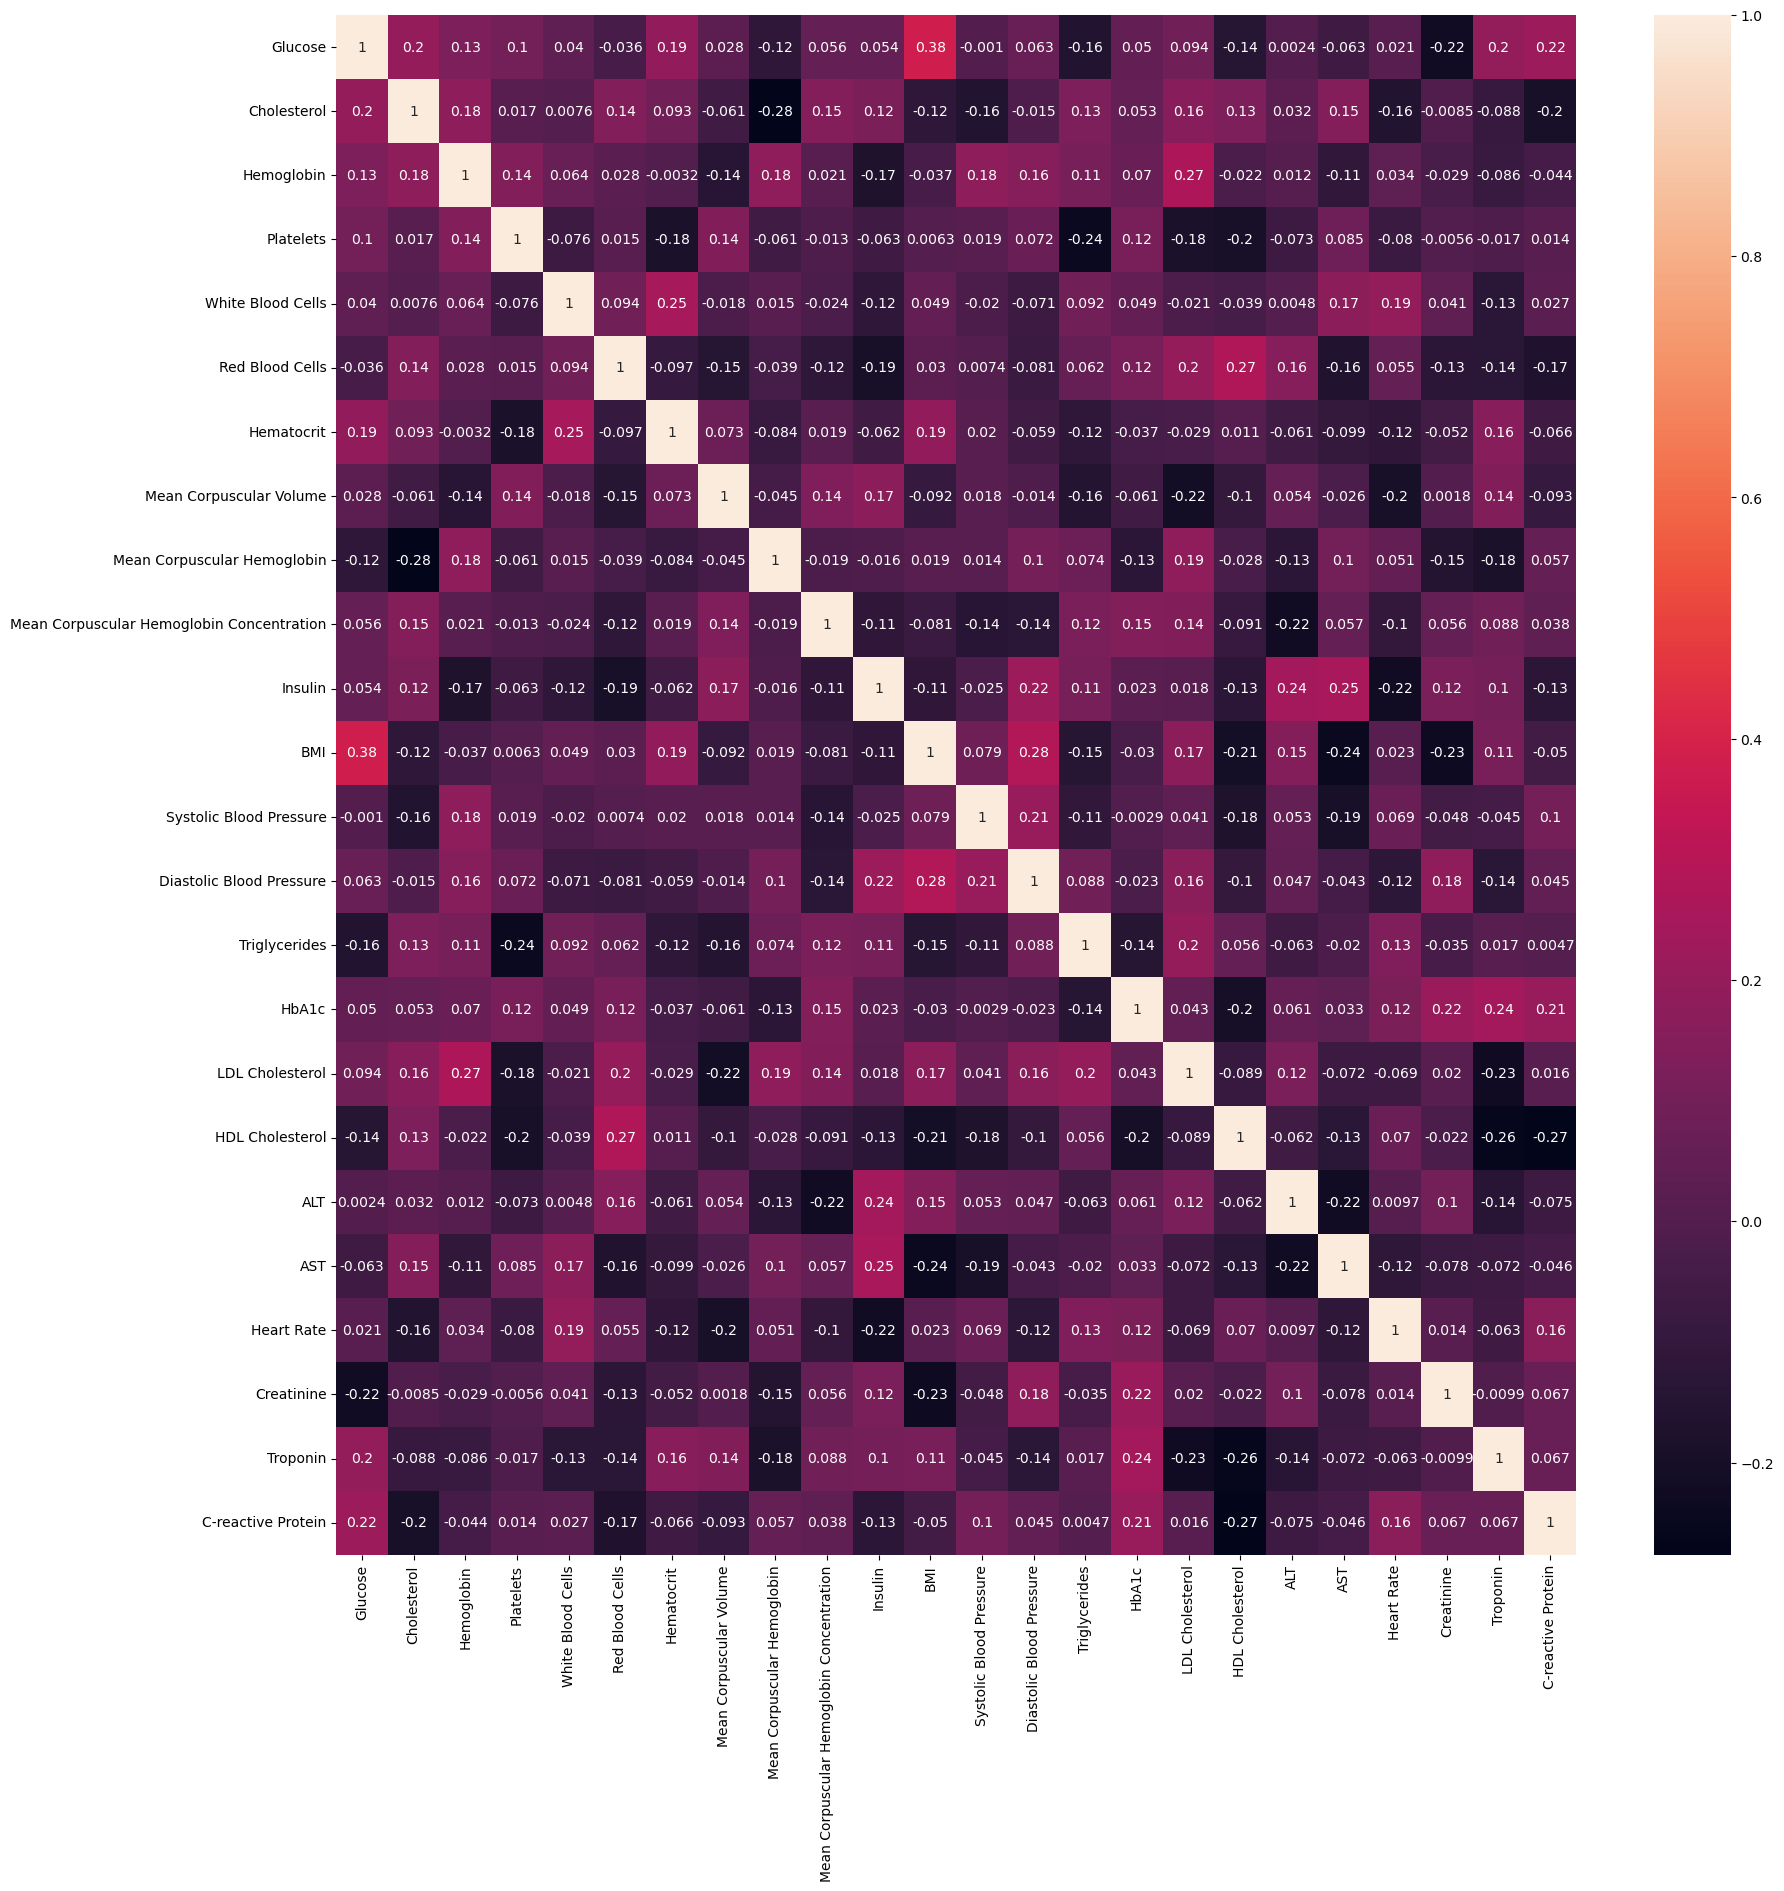

In [22]:
# Correlation metrix using heatmap
plt.figure(figsize = (20,20))
sns.heatmap(train_df.iloc[:,:-1].corr(), annot=True, fmt='.2g')
plt.show()

In [51]:
cols = ['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       ]

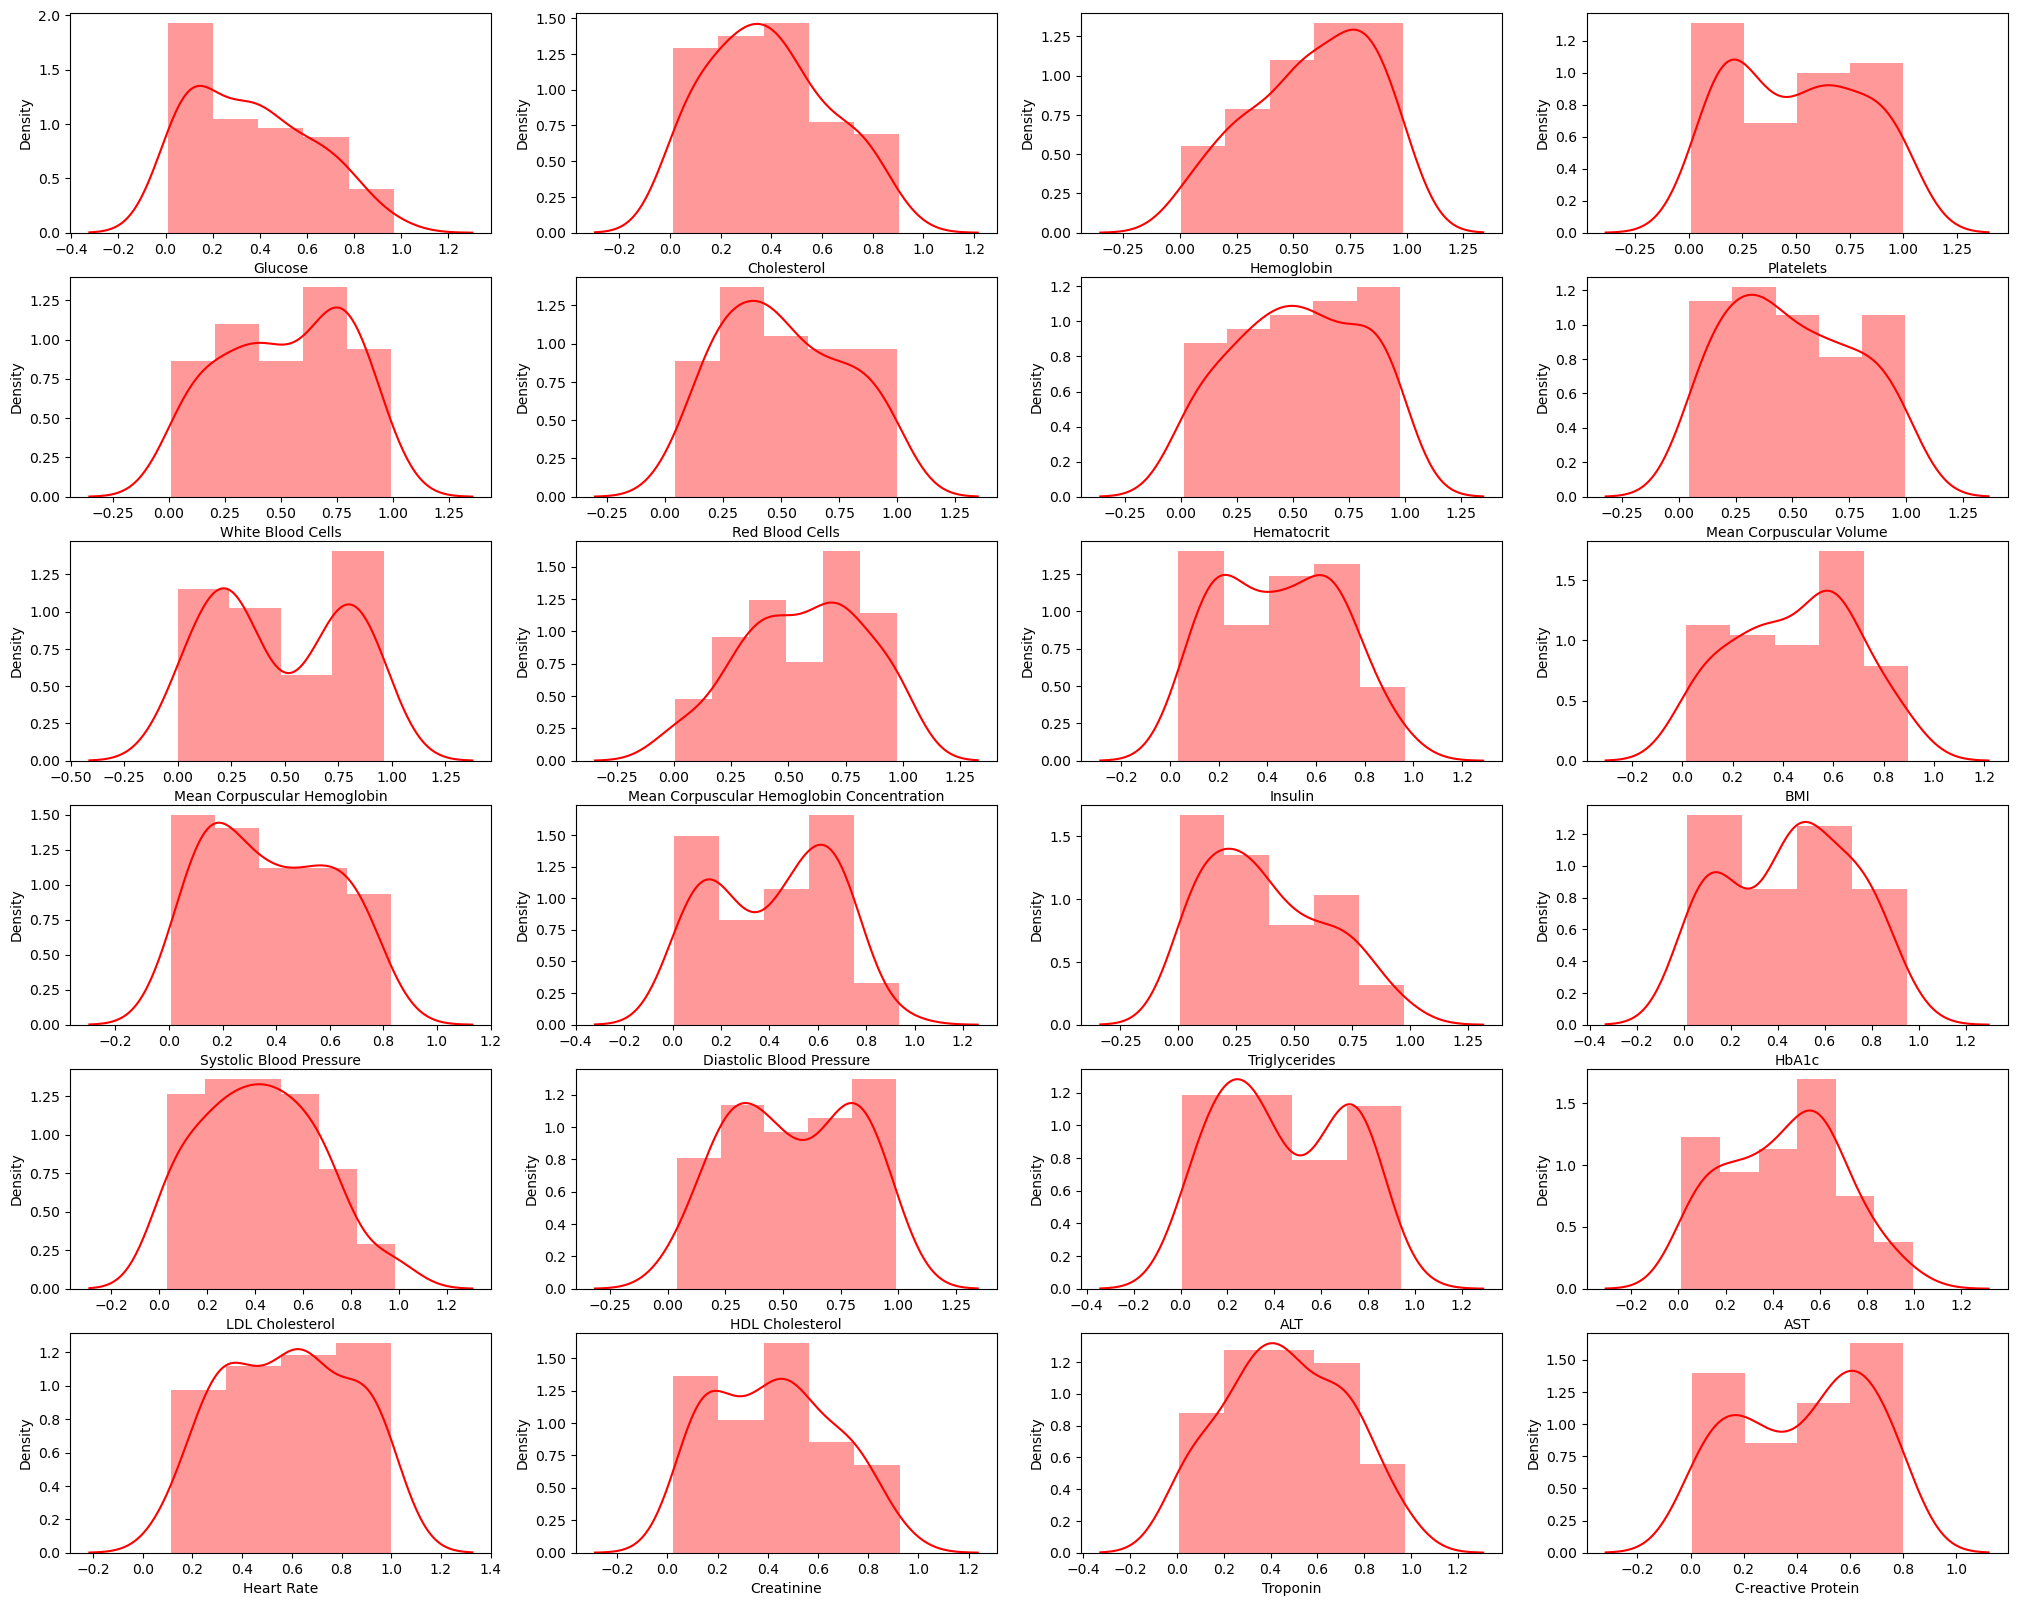

In [52]:
# Checking the distributation of each column
plt.figure(figsize = (25,20))
plotnumber = 1
for i in cols:
    if plotnumber <= len(cols):
        plt.subplot(6,4,plotnumber)
        sns.distplot(train_df[i], color='r',)
    plotnumber+=1
plt.show()
    
    
#Form the below graphs we can say our data is sort of normally distributated

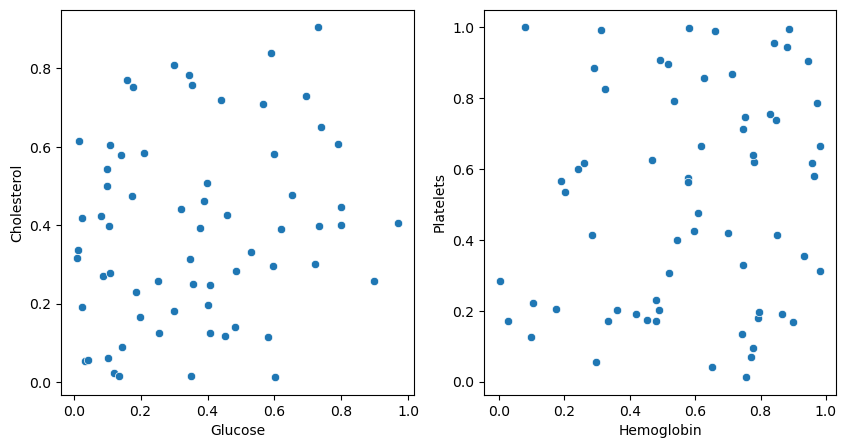

In [53]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.scatterplot(train_df, x = 'Glucose', y = 'Cholesterol')
plt.subplot(122)
sns.scatterplot(train_df, x='Hemoglobin',y = 'Platelets')
plt.show()

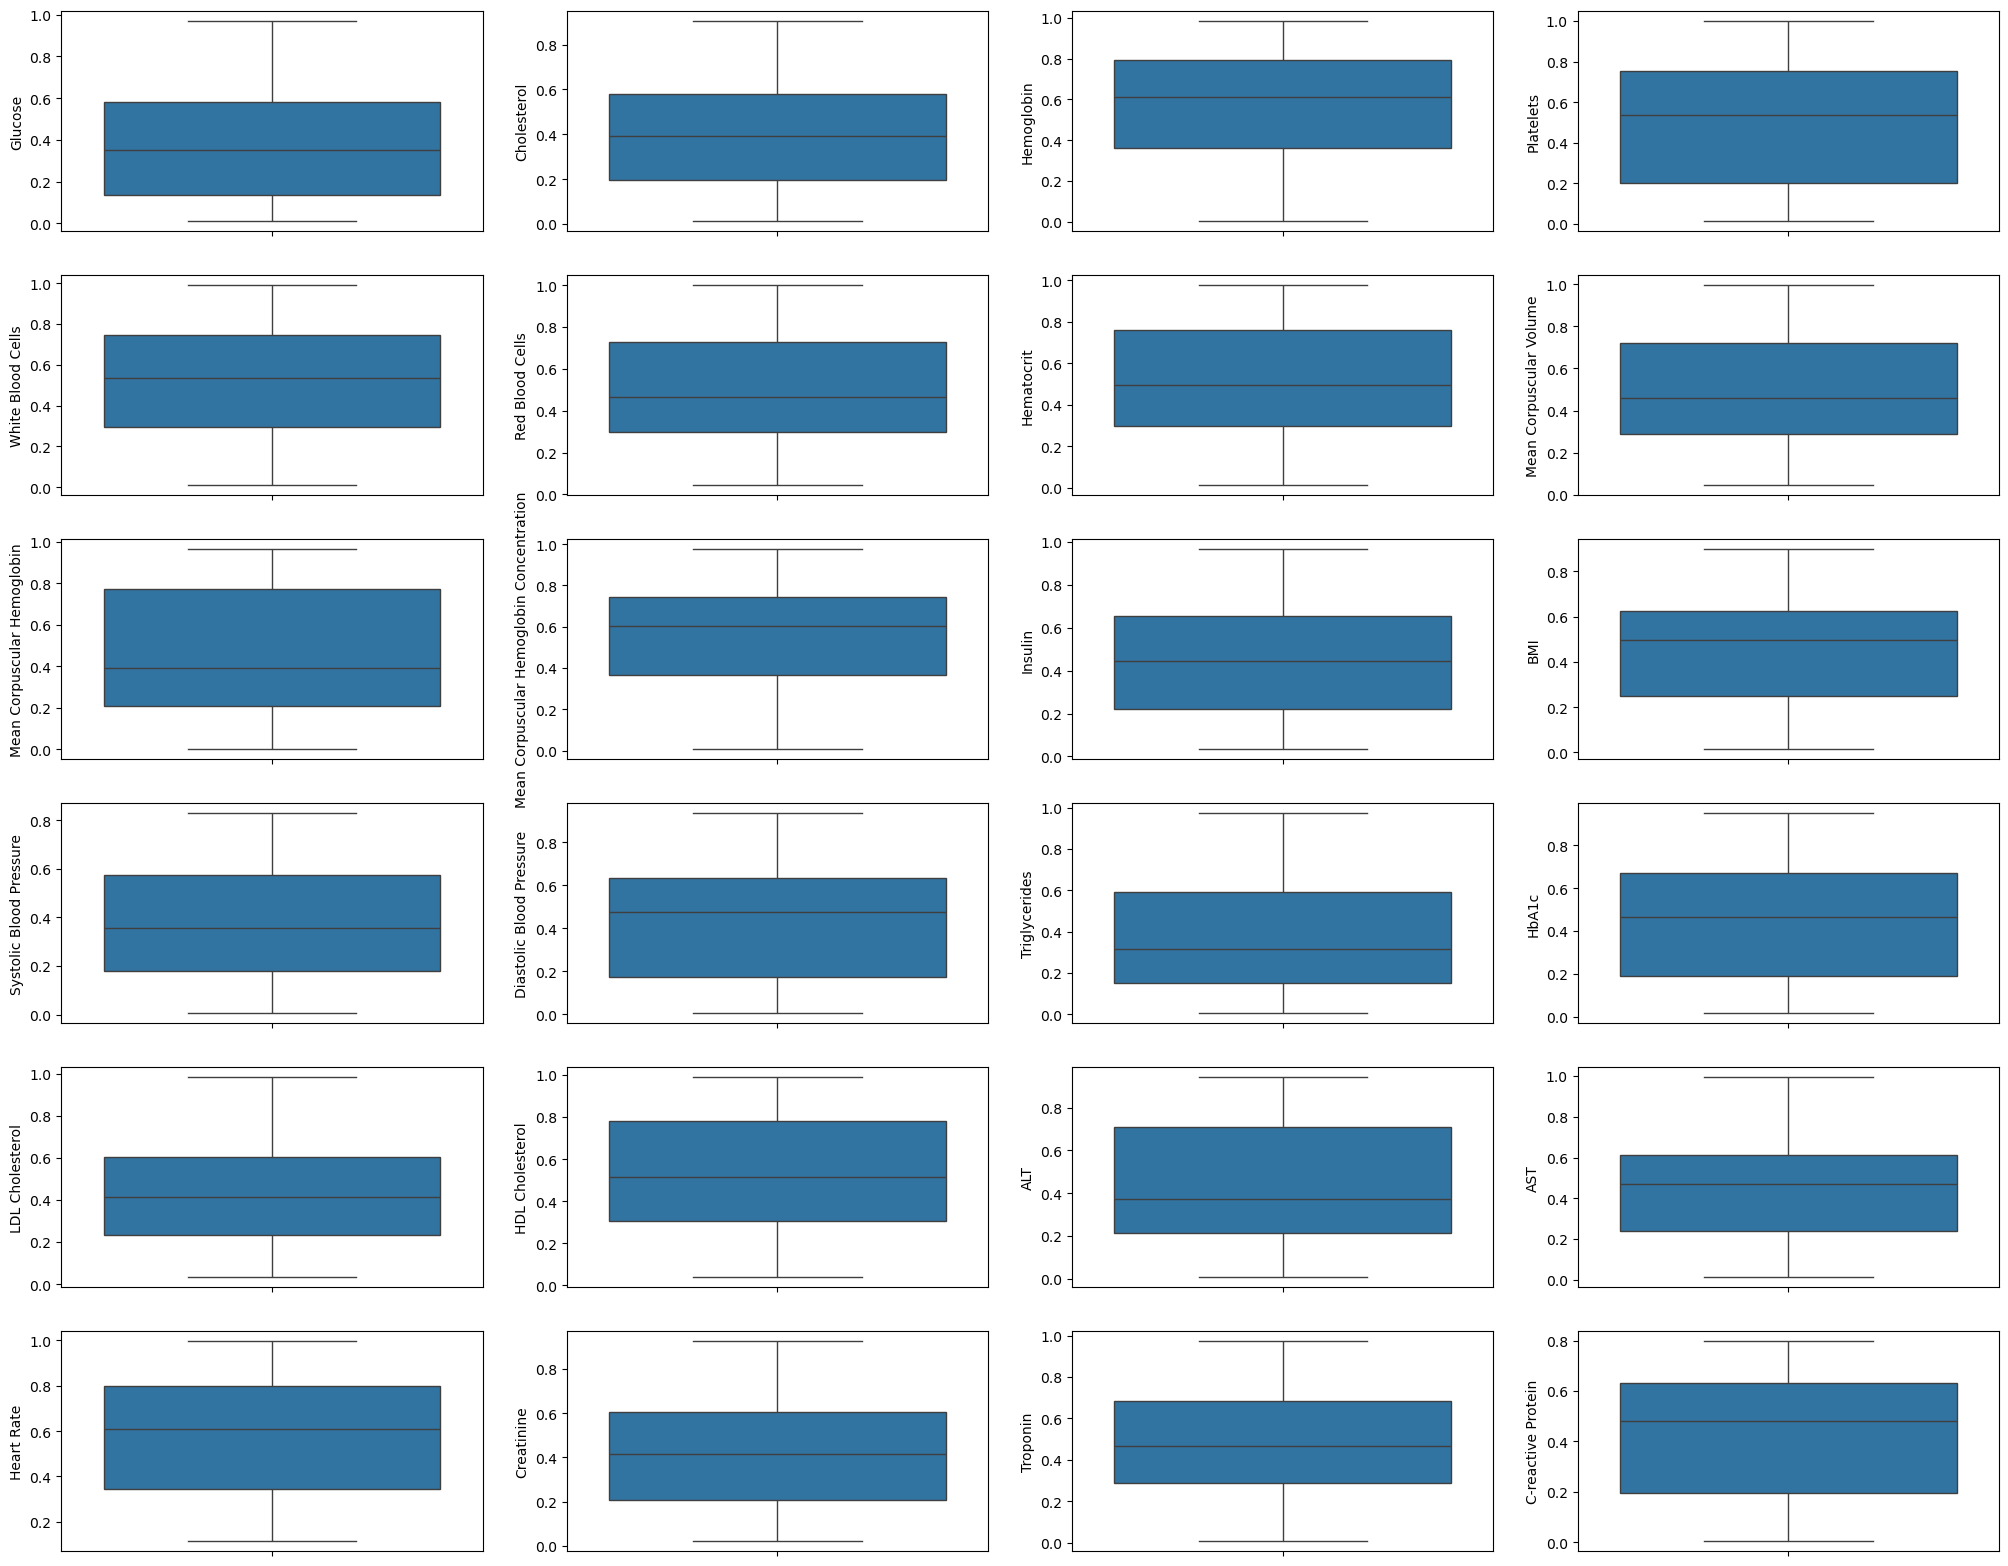

In [54]:
# Let's check for the outliers using boxplots
plt.figure(figsize = (25,20))
plotnumber = 1
for i in cols:
    if plotnumber <= len(cols):
        plt.subplot(6,4,plotnumber)
        sns.boxplot(train_df[i])
    plotnumber+=1
plt.show()


# No Outliers in the dataset

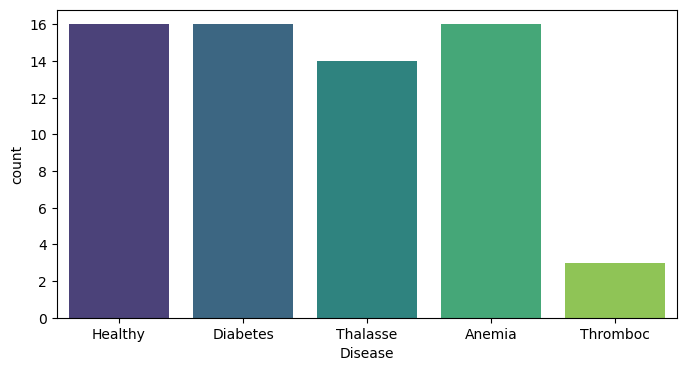

In [55]:
# Let's see the target column
plt.figure(figsize = (8,4))
sns.countplot(data = train_df, x='Disease', palette='viridis')
plt.show()

In [56]:
#plt.figure(figsize = (25,20))
#sns.pairplot(train_df)
#plt.show()

In [57]:
# No relation in this dataset, It will be an interesting challenge
# Let's plan , since this dataset has no correlation wee need to use the algorithms which are not rely heavily on linear relationships.
# for example : decision trees, random forest
#Ensemble models (e.g., Random Forests, XGBoost) can handle weakly correlated features effectively.

In [58]:
train_df["Disease"].value_counts()

Disease
Healthy     16
Diabetes    16
Anemia      16
Thalasse    14
Thromboc     3
Name: count, dtype: int64

In [59]:
test_df["Disease"].value_counts()

Disease
Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: count, dtype: int64

#### We have one extra category into the test data which is Heart Di.
* Extra category into the test dataset can create the problem while transforming and model prediction

#### we can make 2 decisions : 
1. We remove this Extra category('Heart Di) and work with other categories
2. Or We can simply make only two categories (1: Diseased(Diabetes, Anemia, Thalasse, Heart Di, Thromboc), 0: Non-diseased(Healthy)

In [60]:
# let's go with 2nd option , creating only two categories
value_mapping = {
    'Healthy': 'non_diseased',
    'Diabetes': 'disease',
    'Anemia': 'disease',
    'Thalasse': 'disease',
    'Thromboc': 'disease',
    'Heart Di': 'disease'
}

# Replace the values in the 'health_status' column
train_df['Disease'] = train_df['Disease'].replace(value_mapping)
test_df['Disease'] = test_df['Disease'].replace(value_mapping)

In [61]:
train_df['Disease'] 

0      non_diseased
1           disease
2           disease
3           disease
4           disease
           ...     
186    non_diseased
237         disease
245         disease
259         disease
361         disease
Name: Disease, Length: 65, dtype: object

In [62]:
test_df['Disease']

0      disease
1      disease
2      disease
3      disease
4      disease
        ...   
481    disease
482    disease
483    disease
484    disease
485    disease
Name: Disease, Length: 486, dtype: object

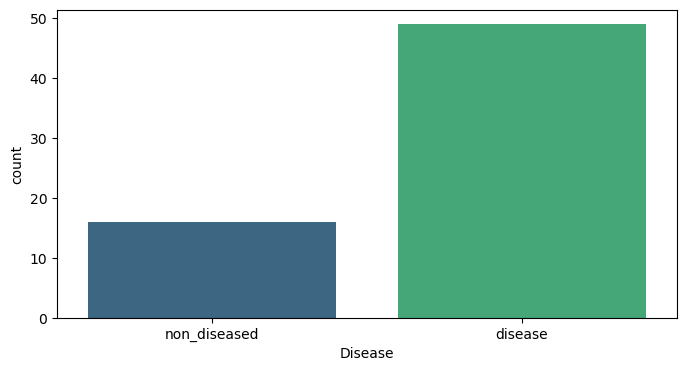

In [63]:
plt.figure(figsize = (8,4))
sns.countplot(data = train_df, x='Disease', palette='viridis')
plt.show()

In [64]:
train_df['Disease'].value_counts()

Disease
disease         49
non_diseased    16
Name: count, dtype: int64

In [65]:
# We have now 2 categories with imbalanced data

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
x = train_df.iloc[:,:-1]
x_test = test_df.iloc[:,:-1]
y = train_df.iloc[:,-1]
y_test = test_df.iloc[:,-1]

In [68]:
# Balancing the data using SMOTE 
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(x, y)

In [69]:
print(X_train.shape , x_test.shape)

(98, 24) (486, 24)


In [70]:
y_train.value_counts()

Disease
non_diseased    49
disease         49
Name: count, dtype: int64

In [71]:
print(X_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(98, 24) (98,)
(486, 24) (486,)


In [72]:
# PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.decomposition import PCA

In [74]:
# VIF dataframe 
scale = StandardScaler()
x_train = scale.fit_transform(X_train)
x_test = scale.transform(x_test)



vif_data = pd.DataFrame() 
vif_data["feature"] = X_train.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train, i) 
                          for i in range(len(X_train.columns))] 
  
print(vif_data)

                                      feature       VIF
0                                     Glucose  2.067356
1                                 Cholesterol  1.752826
2                                  Hemoglobin  1.678763
3                                   Platelets  1.407055
4                           White Blood Cells  1.625292
5                             Red Blood Cells  1.750714
6                                  Hematocrit  1.388399
7                     Mean Corpuscular Volume  1.315096
8                 Mean Corpuscular Hemoglobin  1.695381
9   Mean Corpuscular Hemoglobin Concentration  1.578494
10                                    Insulin  2.179126
11                                        BMI  1.972970
12                    Systolic Blood Pressure  1.357223
13                   Diastolic Blood Pressure  1.745182
14                              Triglycerides  1.820214
15                                      HbA1c  1.650050
16                            LDL Cholesterol  1

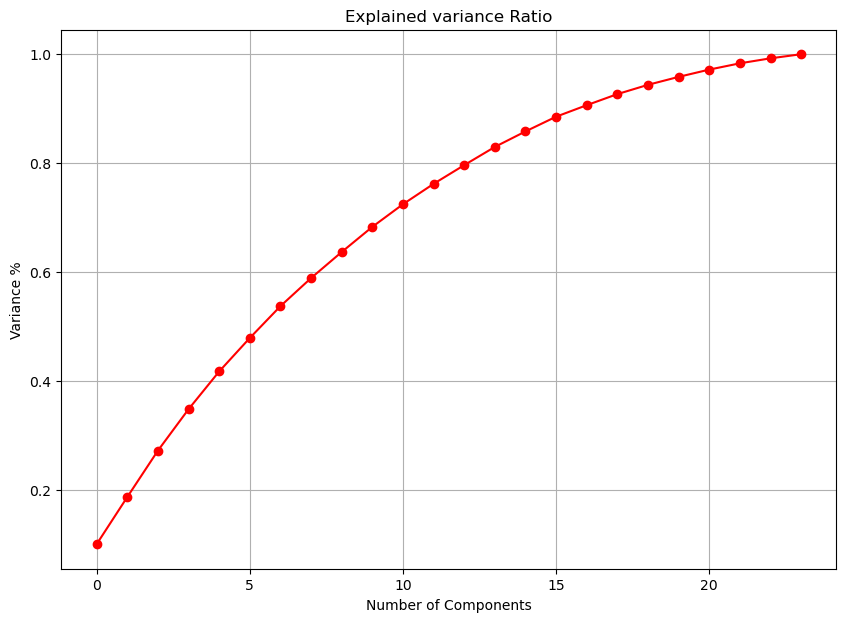

In [78]:
# PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(x_train)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [77]:
# AS per the graph, we can see that 16 principal components attribute for 90% of variation in the data. We shall pick the first 16 components for our prediction

In [79]:
pca = PCA(n_components=16)
x_train = pca.fit_transform(x_train)
x_test =  pca.transform(x_test)

In [92]:
x_train.shape

(98, 16)

In [95]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [83]:
# Add model which you want to train 
DecisionTreeClassifier = DecisionTreeClassifier()
RandomForestClassifier = RandomForestClassifier()
LogisticRegression = LogisticRegression()
SVC = SVC()
GaussianNB = GaussianNB()
KNeighborsClassifier = KNeighborsClassifier()
ExtraTreesClassifier = ExtraTreesClassifier()
GradientBoostingClassifier=GradientBoostingClassifier()
# You can add more model here

In [102]:
# creating the function for test the different models
def model(model_name):
    print(model_name,'\n')
    pipe = make_pipeline(trf1, trf2,model_name)
    
  #training the model
    pipe.fit(x_train,y_train)
    

  #prediction   
    y_train_pred = pipe.predict(x_train)
    y_test_pred = pipe.predict(x_test)
    
  #training performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    
  #testing performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    
    
    cls_test = classification_report(y_test,y_test_pred)
    
    
    print("* Model performace for training set")
    print("Accuracy Score :",model_train_accuracy)

    
    print("\n")
    print("* Model performace for testing set ")
    print("Accuracy Score :",model_test_accuracy)
    print("\n Confusion matrix \n",confusion_matrix(y_test,y_test_pred))
    print("\n Classification Report \n",classification_report(y_test,y_test_pred))
    
    print(" --------------------------------------------------- ")
    print("\n")   

In [107]:
train_acc = []
test_acc = []

model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        GradientBoostingClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
      #training the model
    m.fit(x_train,y_train)
    

  #prediction   
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    
  #training performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    
  #testing performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    
    
    cls_test = classification_report(y_test,y_test_pred)
    
    print('model = ',m)
    print("* Model performace for training set")
    print("Accuracy Score :",model_train_accuracy)
    train_acc.append(model_train_accuracy)

    
    print("\n")
    print("* Model performace for testing set ")
    print("Accuracy Score :",model_test_accuracy)
    test_acc.append(model_test_accuracy)
    print("\n Confusion matrix \n",confusion_matrix(y_test,y_test_pred))
    print("\n Classification Report \n",classification_report(y_test,y_test_pred))
    
    print(" --------------------------------------------------- ")
    print("\n")   

model =  LogisticRegression()
* Model performace for training set
Accuracy Score : 0.8877551020408163
[0.8877551020408163]


* Model performace for testing set 
Accuracy Score : 0.6111111111111112

 Confusion matrix 
 [[293 188]
 [  1   4]]

 Classification Report 
               precision    recall  f1-score   support

     disease       1.00      0.61      0.76       481
non_diseased       0.02      0.80      0.04         5

    accuracy                           0.61       486
   macro avg       0.51      0.70      0.40       486
weighted avg       0.99      0.61      0.75       486

 --------------------------------------------------- 


model =  SVC()
* Model performace for training set
Accuracy Score : 0.9897959183673469
[0.8877551020408163, 0.9897959183673469]


* Model performace for testing set 
Accuracy Score : 0.845679012345679

 Confusion matrix 
 [[408  73]
 [  2   3]]

 Classification Report 
               precision    recall  f1-score   support

     disease       1.00 

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
#Cross validation Score
cv_score = []

model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        GradientBoostingClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    print('model = ', m)
    score = cross_val_score(m,x_train,y_train , cv =5)
    mn = score.mean()
    print("Mean CV Score :",mn)
    cv_score.append(mn)
    
    
    print("="*50,'\n')

model =  LogisticRegression()
Mean CV Score : 0.8168421052631578

model =  SVC()
Mean CV Score : 0.9389473684210525

model =  GaussianNB()
Mean CV Score : 0.8789473684210527

model =  DecisionTreeClassifier()
Mean CV Score : 0.7342105263157894

model =  KNeighborsClassifier(n_neighbors=3)
Mean CV Score : 0.6836842105263158

model =  RandomForestClassifier()
Mean CV Score : 0.9178947368421053

model =  ExtraTreesClassifier()
Mean CV Score : 0.9389473684210525

model =  GradientBoostingClassifier()
Mean CV Score : 0.858421052631579

model =  ExtraTreesClassifier()
Mean CV Score : 0.9389473684210525



In [114]:
result = pd.DataFrame({'Model Name ':[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        GradientBoostingClassifier(),
        ExtraTreesClassifier()],"training_accuracy":train_acc,'testing_accuracy':test_acc, 'cv_Score':cv_score})

In [115]:
result

,Model Name,training_accuracy,testing_accuracy,cv_Score
0,LogisticRegression(),0.887755,0.611111,0.816842
1,SVC(),0.989796,0.845679,0.938947
2,GaussianNB(),0.928571,0.942387,0.878947
3,DecisionTreeClassifier(),1.000000,0.695473,0.734211
4,KNeighborsClassifier(n_neighbors=3),0.795918,0.331276,0.683684
5,RandomForestClassifier(),1.000000,0.862140,0.917895
6,ExtraTreesClassifier(),1.000000,0.913580,0.938947
7,GradientBoostingClassifier(),1.000000,0.767490,0.858421
8,ExtraTreesClassifier(),1.000000,0.907407,0.938947


In [118]:
final_model = GaussianNB()
final_model.fit(x_train,y_train)
y_pred = final_model.predict(x_test)
print("acc score = ",accuracy_score(y_test,y_pred))


acc score =  0.9423868312757202


In [119]:
import joblib

In [120]:
joblib.dump(final_model,"Disease_prediction.pkl")

['Disease_prediction.pkl']